


Epoch 1/250

38/38 [==============================] - 2s 14ms/step - loss: 0.0284
Epoch 2/250
38/38 [==============================] - 1s 13ms/step - loss: 0.0039
Epoch 3/250
38/38 [==============================] - 1s 15ms/step - loss: 0.0043
Epoch 4/250
38/38 [==============================] - 1s 14ms/step - loss: 0.0033
Epoch 5/250
38/38 [==============================] - 1s 15ms/step - loss: 0.0029
Epoch 6/250
38/38 [==============================] - 1s 13ms/step - loss: 0.0029
Epoch 7/250
38/38 [==============================] - 1s 13ms/step - loss: 0.0027
Epoch 8/250
38/38 [==============================] - 1s 13ms/step - loss: 0.0024
Epoch 9/250
38/38 [==============================] - 1s 15ms/step - loss: 0.0026
Epoch 10/250
38/38 [==============================] - 1s 15ms/step - loss: 0.0023
Epoch 11/250
38/38 [==============================] - 1s 14ms/step - loss: 0.0023
Epoch 12/250
38/38 [==============================] - 1s 14ms/step - loss: 0.0020
Epoch 13/250
38/38 [=

38/38 [==============================] - 0s 13ms/step - loss: 0.0010
Epoch 91/250
38/38 [==============================] - 0s 13ms/step - loss: 0.0010
Epoch 92/250
38/38 [==============================] - 0s 13ms/step - loss: 9.3622e-04
Epoch 93/250
38/38 [==============================] - 0s 13ms/step - loss: 8.5672e-04
Epoch 94/250
38/38 [==============================] - 0s 13ms/step - loss: 9.7624e-04
Epoch 95/250
38/38 [==============================] - 0s 12ms/step - loss: 9.3166e-04
Epoch 96/250
38/38 [==============================] - 0s 13ms/step - loss: 8.2317e-04
Epoch 97/250
38/38 [==============================] - 0s 13ms/step - loss: 9.6859e-04
Epoch 98/250
38/38 [==============================] - 0s 13ms/step - loss: 8.2810e-04
Epoch 99/250
38/38 [==============================] - 0s 12ms/step - loss: 8.7541e-04
Epoch 100/250
38/38 [==============================] - 0s 13ms/step - loss: 8.6634e-04
Epoch 101/250
38/38 [==============================] - 0s 13ms/step - loss

38/38 [==============================] - 0s 13ms/step - loss: 8.2221e-04
Epoch 185/250
38/38 [==============================] - 0s 13ms/step - loss: 7.7659e-04
Epoch 186/250
38/38 [==============================] - 0s 13ms/step - loss: 8.7874e-04
Epoch 187/250
38/38 [==============================] - 0s 13ms/step - loss: 8.3630e-04
Epoch 188/250
38/38 [==============================] - 0s 13ms/step - loss: 8.1153e-04
Epoch 189/250
38/38 [==============================] - 0s 13ms/step - loss: 7.9046e-04
Epoch 190/250
38/38 [==============================] - 0s 13ms/step - loss: 8.1941e-04
Epoch 191/250
38/38 [==============================] - 0s 13ms/step - loss: 7.6615e-04
Epoch 192/250
38/38 [==============================] - 0s 13ms/step - loss: 8.1714e-04
Epoch 193/250
38/38 [==============================] - 0s 13ms/step - loss: 7.2202e-04
Epoch 194/250
38/38 [==============================] - 0s 12ms/step - loss: 9.0934e-04
Epoch 195/250
38/38 [==============================] - 0s

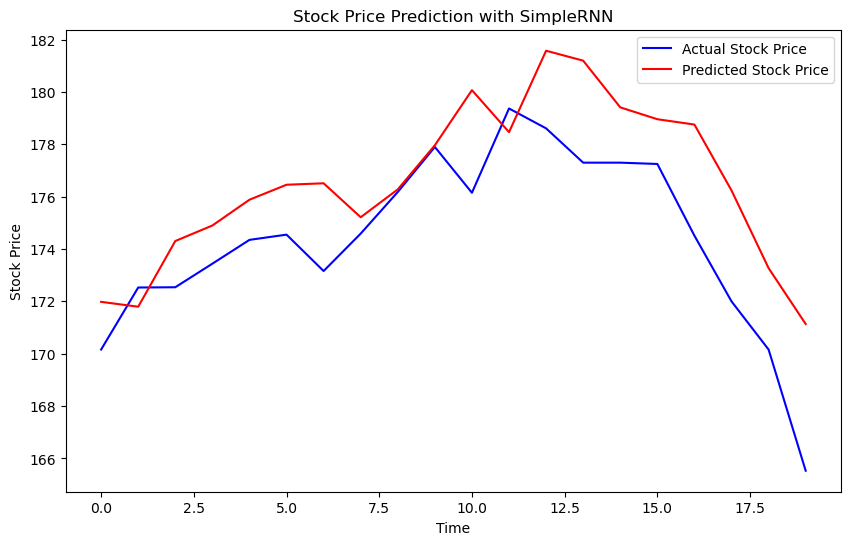

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense
import matplotlib.pyplot as plt

# Loading Data
stock_data = pd.read_csv("AAPL.xls")
stock_prices = stock_data.iloc[:, 1:2].values

# Data Scaling
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(stock_prices)

# Creating Input Sequences and Labels
features, labels = [], []
for i in range(60, len(stock_prices)):
    features.append(scaled_prices[i-60:i, 0])
    labels.append(scaled_prices[i, 0])

features, labels = np.array(features), np.array(labels)
features = np.reshape(features, (features.shape[0], features.shape[1], 1))

# Building the SimpleRNN Model
model = Sequential()
model.add(SimpleRNN(units=200, activation='relu', input_shape=(features.shape[1], 1)))
model.add(Dropout(0.3))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(features, labels, epochs=250, batch_size=32)

# Preparing Testing Data
test_data = pd.read_csv("AAPL - Jan2018.xls")
test_prices = test_data.iloc[:, 1:2].values

total_prices = pd.concat((stock_data['Open'], test_data['Open']), axis=0)

# Scaling and Creating Test Features
test_inputs = total_prices[len(total_prices) - len(test_data) - 60:].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)

test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

# Making Predictions
predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)

# Plotting Results
plt.figure(figsize=(10, 6))
plt.plot(test_prices, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction with SimpleRNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
